In [20]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [8]:
# matrix A:
A = np.matrix([[1,2,3,4],
               [5,5,6,7],
               [1,4,2,3],
               [5,3,2,1],
               [8,1,2,2]])

In [9]:
A

matrix([[1, 2, 3, 4],
        [5, 5, 6, 7],
        [1, 4, 2, 3],
        [5, 3, 2, 1],
        [8, 1, 2, 2]])

# Step 1: standardizing the data:

In [10]:
# organizing the data into a Pandas dataframe:
df_A = pd.DataFrame(A, columns=['f1', 'f2', 'f3', 'f4'])

In [11]:
df_A

,f1,f2,f3,f4
0,1,2,3,4
1,5,5,6,7
2,1,4,2,3
3,5,3,2,1
4,8,1,2,2


In [12]:
# standardizing the data using mean and standard deviation:
df_A_std = (df_A - df_A.mean()) / (df_A.std())

In [13]:
df_A_std

,f1,f2,f3,f4
0,-1.000000,-0.632456,0.000000,0.260623
1,0.333333,1.264911,1.732051,1.563740
2,-1.000000,0.632456,-0.577350,-0.173749
3,0.333333,0.000000,-0.577350,-1.042493
4,1.333333,-1.264911,-0.577350,-0.608121


# Step 2: Calculate the Covariance Matrix: C
# Step 3: Calculate the Eigenvalues and Eigenvectors of C
# Step 4: Reduce dimensions by picking first few eigenvalues
# Step 5: Transform original data using the first few chosen eigenvalues
# are all done together by calling the PCA function from sklearn's decomposition module:

In [14]:
# choosing the first 2 eigenvalues:
n_components = 2

In [16]:
# steps 2, 3 and 4:
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_A_std)

In [18]:
# step 5:
principal_comp_df = pd.DataFrame(data=principal_components, columns=['nf' + str(i + 1) for i in range(n_components)])


In [19]:
principal_comp_df

,nf1,nf2
0,-0.014003,0.755975
1,2.556534,-0.780432
2,0.051480,1.253135
3,-1.014150,0.000239
4,-1.579861,-1.228917


# Let us load the Iris dataset:

In [1]:
import pandas as pd 
from sklearn import datasets
 
iris = datasets.load_iris()
 
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
df = pd.DataFrame(
    iris.data, 
    columns=iris.feature_names
    )
 
df['target'] = iris.target
df['target_names'] = df['target'].map(target_names)


In [2]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Let us visualize how many of each class are present in the database:

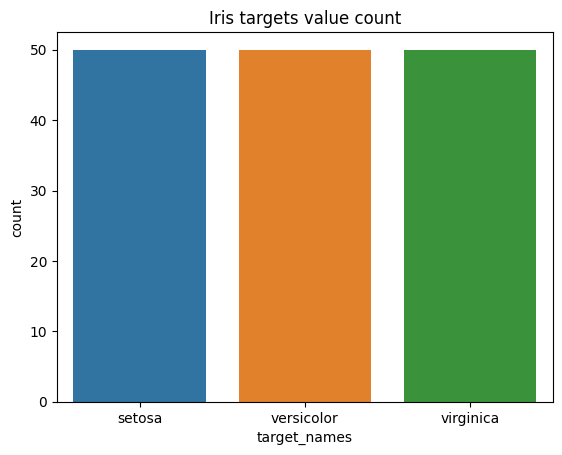

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
 
sns.countplot(
    x='target_names', 
    data=df)
plt.title('Iris targets value count')
plt.show()

In [4]:
X = iris.data
y = iris.target

In [6]:
X.shape, y.shape

((150, 4), (150,))

# scale the data to have unit variance and zero standard deviation (standardize the data)

In [8]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(X)


## implement PCA on the data:

In [9]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3)
 
pca_features = pca.fit_transform(x_scaled)
 
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])

Shape before PCA:  (150, 4)
Shape after PCA:  (150, 3)


## map the targets to the Principal Components:

In [10]:
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df

,PC1,PC2,PC3,target
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa
...,...,...,...,...
145,1.870503,0.386966,0.256274,virginica
146,1.564580,-0.896687,-0.026371,virginica
147,1.521170,0.269069,0.180178,virginica
148,1.372788,1.011254,0.933395,virginica


## how much does each feature impact the prediction of the target? We will use a property called 'explained variance'

In [11]:
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

## let's plot the explained variance:

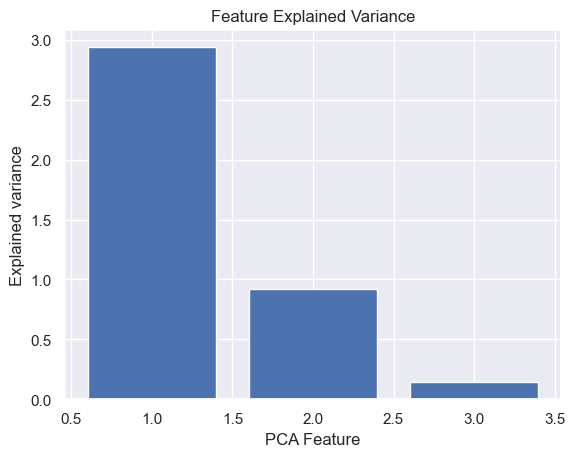

In [12]:
import matplotlib.pyplot as plt 
 
from sklearn.decomposition import PCA
sns.set()
 
# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=3)
 
# Fit and transform data
pca.fit_transform(x_scaled)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

## From this plot, we see that the first two Principal Components explain a vast majority of the variance; and hence, by dropping the other two and considering only the first two PCs, we still retain a huge chunk of information from the original dataset

## Another plot to visualize the same information as above is called the 'Scree' plot. It is a plot of the Eigenvalues of the covariance matrix in descending order:

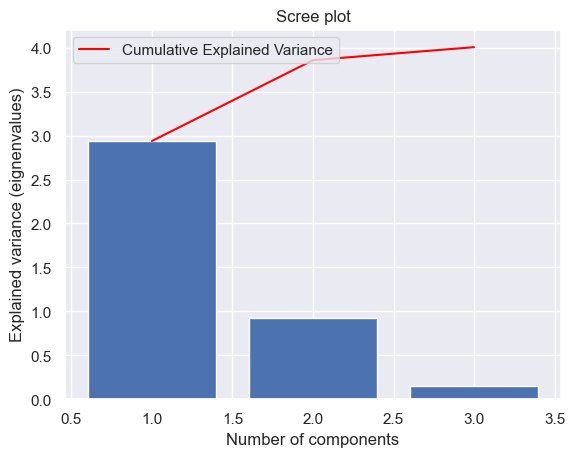

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
 
from sklearn.decomposition import PCA
sns.set()
 
# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=3)
 
# Fit and transform data
reduced_features = pca.fit_transform(x_scaled)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

## Again, we see that the first two Principal Components explain almost 95% of the variance in the original data.
## This is what PCA does: it identifies the 'intrinsic dimensionality' of a dataset.
## In other words, it identifies the smallest number of features required to make an accurate prediction. A dataset may have a lot of features, but not all features are essential to the prediction.

## let us try to visualize the dataset:

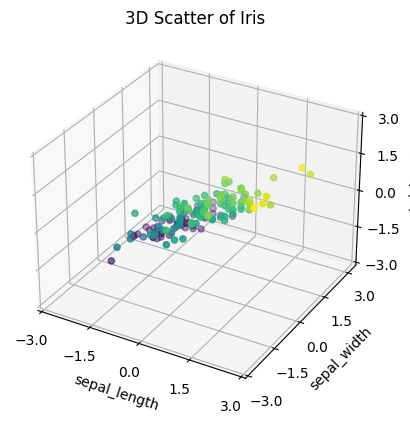

In [14]:
from mpl_toolkits import mplot3d
plt.style.use('default')
 
# Prepare 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')
 
# Plot scaled features
xdata = x_scaled[:,0]
ydata = x_scaled[:,1]
zdata = x_scaled[:,2]
 
# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')
 
# Plot title of graph
plt.title(f'3D Scatter of Iris')
 
# Plot x, y, z even ticks
ticks = np.linspace(-3, 3, num=5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
 
# Plot x, y, z labels
ax.set_xlabel('sepal_length', rotation=150)
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length', rotation=60)
plt.show()

## let us visualize the 2-D PCA graph:

/Users/vinci/.local/share/virtualenvs/vinci-gH8p2WF4/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


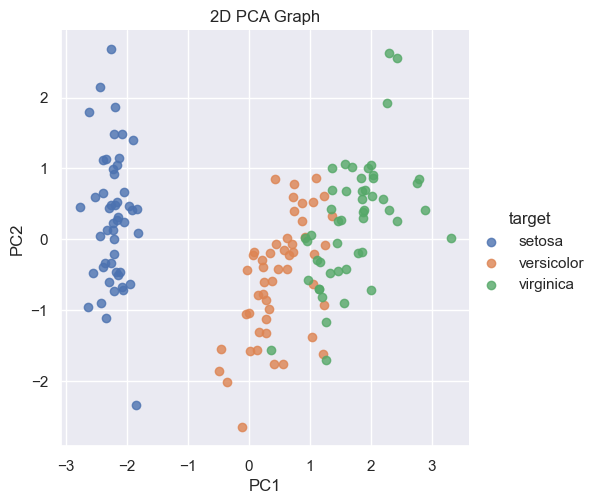

In [15]:
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

## So, we have thrown out 50% of our original data (4 columns to 2 columns), because we chose the first two Principal Components which contain the majority of the statistical variance of the original data. 
## The visualization shows us that it is fairly easy to deploy clustering or classification algorithms on this data: the 'setosa' class is fairly distant from the other two and is readily separated by even a simple linear model.
## Some overlap and misclassification may occur in the classification of the 'versicolor' and 'virginica' classes; but the misclassification is small. 

## What if we dropped one more PC and retained only the first PC?

In [16]:
pcasolo = PCA(n_components = 1)
solo_PrincipalComponent = pcasolo.fit_transform(x_scaled)

In [20]:
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}

pcasolo_df = pd.DataFrame(data=solo_PrincipalComponent, columns=['PC1'])
pcasolo_df['target'] = y
pcasolo_df['target'] = pcasolo_df['target'].map(target_names)
 
pcasolo_df

,PC1,target
0,-2.264703,setosa
1,-2.080961,setosa
2,-2.364229,setosa
3,-2.299384,setosa
4,-2.389842,setosa
...,...,...
145,1.870503,virginica
146,1.564580,virginica
147,1.521170,virginica
148,1.372788,virginica


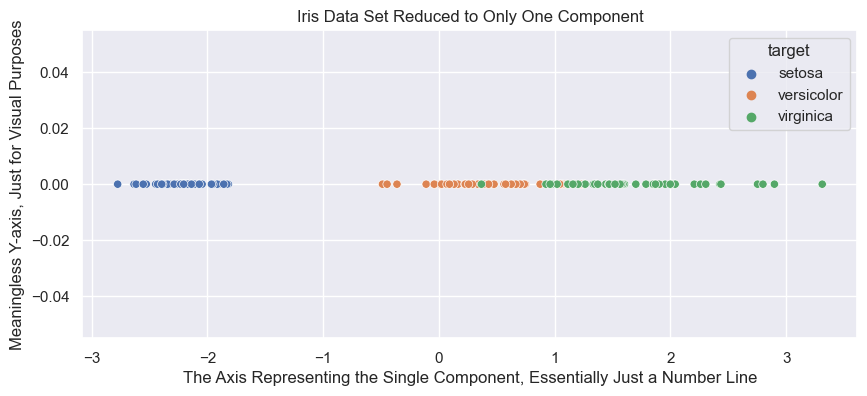

In [47]:
zeros = [0 for i in range(150)]
solo_components = []
for i in solo_PrincipalComponent:
    solo_components.append(i[0])
plt.figure(figsize = (10,4))
sns.scatterplot(x=solo_components, y=zeros, hue=pcasolo_df['target'])
plt.title('Iris Data Set Reduced to Only One Component')
plt.ylabel('Meaningless Y-axis, Just for Visual Purposes')
plt.xlabel('The Axis Representing the Single Component, Essentially Just a Number Line')
plt.show()

## After throwing out 75% of our data (4 columns to the First PC), we still are able to distinguish easily between the 'setosa' and other two.
## A simple linear classifier can separate out the 'setosa' points.
## A simple Clustering algorithm can also be used, which will result in a clear cluster for 'setosa' and prominent clusters for 'versicolor' and 'virginica', some overlap may be observed.
## In essence, even after a severe dimensionality reduction, we have still retained enough information for a simple classifier to work with a high accuracy in predicting the class. This is the advantage of PCA.